In [1]:
import numpy as np
import pandas as pd


In [8]:
data=pd.read_excel(r'C:\Users\asus\Desktop\重要数据.xlsx')

In [9]:
len(data)

6011

In [4]:
data.head()

,序号,所用时间,性别,年龄,受教育程度,城镇,Q1,Q4_1,Q4_2,Q4_3,...,Q9,Q10,Q11,Q12_1,Q13,Q16,Q17_1,Q17_2,Q17_3,Q17_4
0,A1,899,1,11,1,1,1,100,100,0,...,0,0,0,0,0,0,0,0,0,0
1,A10,355,1,35,1,1,1,3000,1000,500,...,0,0,0,0,0,0,0,0,0,0
2,A100,181,1,31,1,2,1,1000,500,0,...,0,0,0,0,0,0,0,0,0,0
3,A103,405,2,43,1,2,1,500,300,0,...,0,0,0,0,0,0,0,0,0,0
4,A110,441,2,54,1,2,1,300,0,300,...,1000,0,0,0,0,0,1000,0,0,0


In [ ]:
#缺失值转化，将-3用0替代
#方法一
data[data['Q1']==2]=data[data['Q1']==2].replace(-3,0)
#方法二
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = -3,strategy='constant', fill_value=0)
#data = imputer.fit_transform(data)

In [6]:
data.isnull().sum()#查找有多少缺少值
#data.info()

序号       0
所用时间     0
性别       0
年龄       0
受教育程度    0
城镇       0
Q1       0
Q4_1     0
Q4_2     0
Q4_3     0
Q4_4     0
Q7       0
Q8_1     0
Q9       0
Q10      0
Q11      0
Q12_1    0
Q13      0
Q16      0
Q17_1    0
Q17_2    0
Q17_3    0
Q17_4    0
dtype: int64

<AxesSubplot:>

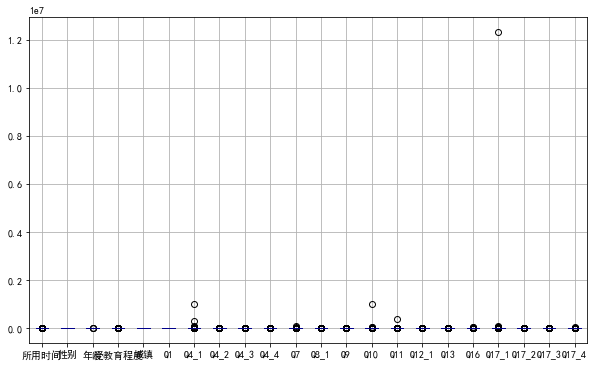

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
fig,ax = plt.subplots(1,1,figsize = (10,6))
#sns.set_style({'font.sans-serif':['SimHei','Arial']})#设定汉字字体，防止出现方框
color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
# 箱型图着色
# boxes 箱线
# whiskers 分为数于error bar横线之间的竖线的颜色
# medians 中位线的颜色
# caps error bar 横线的颜色
data.plot.box(grid = True,
            color  = color,   # color 样式填充
            ax = ax)

In [9]:
name=['Q4_1','Q10','Q11','Q17_1']
q1=data['Q4_1'].quantile(0.99)
q2=data['Q10'].quantile(0.99)
q3=data['Q11'].quantile(0.99)
q4=data['Q17_1'].quantile(0.99)
print(q1,q2,q3,q4)

5000.0 1000.0 300.0 4919.999999999709


In [10]:
list1=[q1,q2,q3,q4]
print(list1)

[5000.0, 1000.0, 300.0, 4919.999999999709]


In [12]:
up={}
for key,value in zip(name,list1):
    up[key]=value
print("上限：",up)

上限： {'Q4_1': 5000.0, 'Q10': 1000.0, 'Q11': 300.0, 'Q17_1': 4919.999999999709}


In [13]:
#df=data.copy()
for name in name:
    data=data[(data[name]<up[name])] 
data

,序号,所用时间,性别,年龄,受教育程度,城镇,Q1,Q4_1,Q4_2,Q4_3,...,Q9,Q10,Q11,Q12_1,Q13,Q16,Q17_1,Q17_2,Q17_3,Q17_4
0,A1,899,1,11,1,1,1,100,100,0,...,0,0,0,0,0,0,0,0,0,0
1,A10,355,1,35,1,1,1,3000,1000,500,...,0,0,0,0,0,0,0,0,0,0
2,A100,181,1,31,1,2,1,1000,500,0,...,0,0,0,0,0,0,0,0,0,0
3,A103,405,2,43,1,2,1,500,300,0,...,0,0,0,0,0,0,0,0,0,0
4,A110,441,2,54,1,2,1,300,0,300,...,1000,0,0,0,0,0,1000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,D995,583,1,16,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,D996,531,2,41,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6008,D997,197,1,16,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6009,D998,424,1,17,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

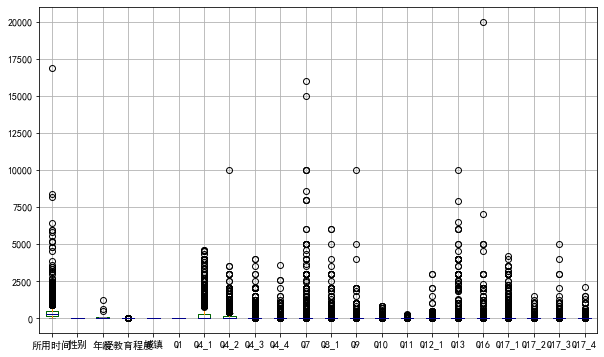

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
fig,ax = plt.subplots(1,1,figsize = (10,6))
#sns.set_style({'font.sans-serif':['SimHei','Arial']})#设定汉字字体，防止出现方框
color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
# 箱型图着色
# boxes 箱线
# whiskers 分为数于error bar横线之间的竖线的颜色
# medians 中位线的颜色
# caps error bar 横线的颜色
data.plot.box(grid = True,
            color  = color,   # color 样式填充
            ax = ax)

In [15]:
#用quantile计算第40%的分位数
#grouped['gmv'].quantile(0.4) 
#用to_csv生成文件
data.to_csv(r'C:\Users\asus\Desktop\处理后的数据.csv')

In [16]:
data.columns

Index(['序号', '所用时间', '性别', '年龄', '受教育程度', '城镇', 'Q1', 'Q4_1', 'Q4_2', 'Q4_3',
       'Q4_4', 'Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4'],
      dtype='object')

In [4]:
list1=[]
columns=['Q4_1', 'Q4_2', 'Q4_3',
       'Q4_4', 'Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']
#df=data.copy()
for name in columns:
    list1.append(data[name].quantile(0.99))
print(list1)

[5000.0, 2000.0, 1500.0, 1000.0, 3000.0, 1000.0, 1000.0, 1000.0, 300.0, 397.799999999992, 2000.0, 1980.7999999999302, 4919.999999999709, 500.0, 500.0, 500.0]


In [5]:
up={}
for key,value in zip(columns,list1):
    up[key]=value
print("上限：",up)

上限： {'Q4_1': 5000.0, 'Q4_2': 2000.0, 'Q4_3': 1500.0, 'Q4_4': 1000.0, 'Q7': 3000.0, 'Q8_1': 1000.0, 'Q9': 1000.0, 'Q10': 1000.0, 'Q11': 300.0, 'Q12_1': 397.799999999992, 'Q13': 2000.0, 'Q16': 1980.7999999999302, 'Q17_1': 4919.999999999709, 'Q17_2': 500.0, 'Q17_3': 500.0, 'Q17_4': 500.0}


In [6]:
#df=data.copy()
for name in columns:
    data=data[(data[name]<up[name])] 
data

,序号,所用时间,性别,年龄,受教育程度,城镇,Q1,Q4_1,Q4_2,Q4_3,...,Q9,Q10,Q11,Q12_1,Q13,Q16,Q17_1,Q17_2,Q17_3,Q17_4
0,A1,899,1,11,1,1,1,100,100,0,...,0,0,0,0,0,0,0,0,0,0
1,A10,355,1,35,1,1,1,3000,1000,500,...,0,0,0,0,0,0,0,0,0,0
2,A100,181,1,31,1,2,1,1000,500,0,...,0,0,0,0,0,0,0,0,0,0
3,A103,405,2,43,1,2,1,500,300,0,...,0,0,0,0,0,0,0,0,0,0
5,A115,1080,1,36,2,1,1,3000,1500,200,...,500,500,0,0,200,0,2000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,D995,583,1,16,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,D996,531,2,41,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6008,D997,197,1,16,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6009,D998,424,1,17,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.to_csv(r'C:\Users\asus\Desktop\处理后的数据1.csv')

In [10]:
describe = data.describe()
describe

,所用时间,性别,年龄,受教育程度,城镇,Q1,Q4_1,Q4_2,Q4_3,Q4_4,...,Q9,Q10,Q11,Q12_1,Q13,Q16,Q17_1,Q17_2,Q17_3,Q17_4
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,...,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,376.804459,1.620431,31.607822,1.145468,1.526316,1.668860,234.188596,118.225512,41.677083,17.528509,...,9.629751,9.305738,3.060307,3.488304,8.427083,15.353801,49.912646,4.009503,6.292032,3.920687
std,490.508629,0.485324,27.123493,0.362824,0.499353,0.470666,503.894135,264.704723,126.585977,67.959751,...,50.985961,52.512309,20.205018,22.691567,69.196087,101.615835,227.195931,25.416586,32.356019,24.527014
min,33.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.000000,1.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,2.000000,31.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,438.250000,2.000000,44.000000,1.000000,2.000000,2.000000,200.000000,100.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16855.000000,2.000000,1236.000000,3.000000,2.000000,2.000000,4000.000000,1900.000000,1200.000000,800.000000,...,628.000000,800.000000,200.000000,360.000000,1960.000000,1808.000000,3500.000000,400.000000,495.000000,400.000000


In [14]:
print(np.argmax(data['年龄']))  # 返回第一个最小值的位置

2658


In [12]:
data.drop([2658],axis=0)

,序号,所用时间,性别,年龄,受教育程度,城镇,Q1,Q4_1,Q4_2,Q4_3,...,Q9,Q10,Q11,Q12_1,Q13,Q16,Q17_1,Q17_2,Q17_3,Q17_4
0,A1,899,1,11,1,1,1,100,100,0,...,0,0,0,0,0,0,0,0,0,0
1,A10,355,1,35,1,1,1,3000,1000,500,...,0,0,0,0,0,0,0,0,0,0
2,A100,181,1,31,1,2,1,1000,500,0,...,0,0,0,0,0,0,0,0,0,0
3,A103,405,2,43,1,2,1,500,300,0,...,0,0,0,0,0,0,0,0,0,0
5,A115,1080,1,36,2,1,1,3000,1500,200,...,500,500,0,0,200,0,2000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,D995,583,1,16,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,D996,531,2,41,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6008,D997,197,1,16,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6009,D998,424,1,17,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
describe = data.describe()
describe

,所用时间,性别,年龄,受教育程度,城镇,Q1,Q4_1,Q4_2,Q4_3,Q4_4,...,Q9,Q10,Q11,Q12_1,Q13,Q16,Q17_1,Q17_2,Q17_3,Q17_4
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,...,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,376.804459,1.620431,31.607822,1.145468,1.526316,1.668860,234.188596,118.225512,41.677083,17.528509,...,9.629751,9.305738,3.060307,3.488304,8.427083,15.353801,49.912646,4.009503,6.292032,3.920687
std,490.508629,0.485324,27.123493,0.362824,0.499353,0.470666,503.894135,264.704723,126.585977,67.959751,...,50.985961,52.512309,20.205018,22.691567,69.196087,101.615835,227.195931,25.416586,32.356019,24.527014
min,33.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.000000,1.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,2.000000,31.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,438.250000,2.000000,44.000000,1.000000,2.000000,2.000000,200.000000,100.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16855.000000,2.000000,1236.000000,3.000000,2.000000,2.000000,4000.000000,1900.000000,1200.000000,800.000000,...,628.000000,800.000000,200.000000,360.000000,1960.000000,1808.000000,3500.000000,400.000000,495.000000,400.000000


In [17]:
data.iloc[2658]

序号       B1444
所用时间       875
性别           2
年龄        1236
受教育程度        1
城镇           2
Q1           2
Q4_1         0
Q4_2         0
Q4_3         0
Q4_4         0
Q7           0
Q8_1         0
Q9           0
Q10          0
Q11          0
Q12_1        0
Q13          0
Q16          0
Q17_1        0
Q17_2        0
Q17_3        0
Q17_4        0
Name: 3197, dtype: object

# 数据处理

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_excel(r'E:\qq文档\data.xlsx')

In [3]:
len(data)

6008

In [7]:
data.head()

,序号,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,...,Q15(（9）其它（请填写）),Q15(（10）未参加),Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）)
0,B15,920,2,81,1,5,1,1,6,1,...,0,1,2,4,1,1,1,1,0,0
1,A1,899,1,11,1,6,1,1,3,1,...,0,0,1,1,0,0,1,0,0,0
2,A10,355,1,35,1,3,3,1,4,1,...,0,0,2,1,0,0,1,0,0,0
3,A100,181,1,31,1,3,3,2,4,1,...,0,0,1,1,1,0,0,0,0,0
4,A103,405,2,43,1,4,1,2,4,1,...,0,1,1,4,0,0,1,0,0,0


In [10]:
data.isnull().sum()#查找有多少缺少值

序号                                0
所用时间                              0
性别                                0
年龄                                0
教育程度                              0
                                 ..
Q20(（2）提供体育培训服务)                  0
Q20(（3）推动公共体育场馆开放)                0
Q20(（4）发放体育惠民消费券)                 0
Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等)    0
Q20(（6）其它（请填写）)                   0
Length: 147, dtype: int64

In [11]:
list1=[]
columns=['Q4 _1', 'Q4_2', 'Q4_3',
       'Q4_4', 'Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']
#df=data.copy()
for name in columns:
    list1.append(data[name].quantile(0.99))
print(list1)

[2000.0, 1500.0, 1000.0, 1000.0, 3000.0, 1000.0, 1000.0, 1000.0, 300.0, 398.4600000000064, 2000.0, 1986.5600000000559, 500.0, 500.0, 500.0, 600.0]


In [13]:
up={}
for key,value in zip(columns,list1):
    up[key]=value
print("上限：",up)

上限： {'Q4 _1': 2000.0, 'Q4_2': 1500.0, 'Q4_3': 1000.0, 'Q4_4': 1000.0, 'Q7': 3000.0, 'Q8_1': 1000.0, 'Q9': 1000.0, 'Q10': 1000.0, 'Q11': 300.0, 'Q12_1': 398.4600000000064, 'Q13': 2000.0, 'Q16': 1986.5600000000559, 'Q17_1': 500.0, 'Q17_2': 500.0, 'Q17_3': 500.0, 'Q17_4': 600.0}


In [14]:
#df=data.copy()
for name in columns:
    data=data[(data[name]<up[name])] 
data

,序号,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,...,Q15(（9）其它（请填写）),Q15(（10）未参加),Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）)
0,B15,920,2,81,1,5,1,1,6,1,...,0,1,2,4,1,1,1,1,0,0
1,A1,899,1,11,1,6,1,1,3,1,...,0,0,1,1,0,0,1,0,0,0
2,A10,355,1,35,1,3,3,1,4,1,...,0,0,2,1,0,0,1,0,0,0
3,A100,181,1,31,1,3,3,2,4,1,...,0,0,1,1,1,0,0,0,0,0
4,A103,405,2,43,1,4,1,2,4,1,...,0,1,1,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,D995,583,1,16,1,6,1,2,4,2,...,0,0,1,1,1,1,1,0,1,0
6004,D996,531,2,41,1,3,2,2,4,2,...,0,0,1,5,0,0,1,0,0,0
6005,D997,197,1,16,1,6,1,2,4,2,...,0,0,1,1,1,1,1,1,1,0
6006,D998,424,1,17,1,6,1,2,3,2,...,0,0,1,1,1,0,0,0,0,1


In [16]:
np.min(data['年龄'])

3

In [17]:
#data['年龄1']=pd.cut(data['年龄'],[0,14,59,64,100],labels=False)
data['年龄1']=pd.cut(data['年龄'],[0,14,59,64,100])

In [18]:
data.head()

,序号,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,...,Q15(（10）未参加),Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1
0,B15,920,2,81,1,5,1,1,6,1,...,1,2,4,1,1,1,1,0,0,"(64, 100]"
1,A1,899,1,11,1,6,1,1,3,1,...,0,1,1,0,0,1,0,0,0,"(0, 14]"
2,A10,355,1,35,1,3,3,1,4,1,...,0,2,1,0,0,1,0,0,0,"(14, 59]"
3,A100,181,1,31,1,3,3,2,4,1,...,0,1,1,1,0,0,0,0,0,"(14, 59]"
4,A103,405,2,43,1,4,1,2,4,1,...,1,1,4,0,0,1,0,0,0,"(14, 59]"


In [19]:
data['年龄分段']=pd.cut(data['年龄'],[0,14,59,64,100],labels=False)
data.head()

,序号,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,...,Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1,年龄分段
0,B15,920,2,81,1,5,1,1,6,1,...,2,4,1,1,1,1,0,0,"(64, 100]",3
1,A1,899,1,11,1,6,1,1,3,1,...,1,1,0,0,1,0,0,0,"(0, 14]",0
2,A10,355,1,35,1,3,3,1,4,1,...,2,1,0,0,1,0,0,0,"(14, 59]",1
3,A100,181,1,31,1,3,3,2,4,1,...,1,1,1,0,0,0,0,0,"(14, 59]",1
4,A103,405,2,43,1,4,1,2,4,1,...,1,4,0,0,1,0,0,0,"(14, 59]",1


In [20]:
len(data)

5449

In [21]:
data.to_csv(r'C:\Users\asus\Desktop\处理数据终版.csv')

# 计算

In [1]:
import numpy as np
import pandas as pd

#data=pd.read_csv(r'C:\Users\asus\Desktop\秦皇岛预测\处理数据终版.csv')

In [10]:
data.shape

(5449, 148)

In [2]:
data=pd.read_excel(r'C:\Users\asus\Desktop\处理数据终版.xlsx')

In [9]:
data.head()

,序号,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,Q4合计,...,Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1,年龄分段
0,B,2,81,1,5,1,1,6,1,2058,...,2,4,1,1,1,1,0,0,"(64, 100]",3
1,A,1,11,1,6,1,1,3,1,100,...,1,1,0,0,1,0,0,0,"(0, 14]",0
2,A,1,35,1,3,3,1,4,1,3000,...,2,1,0,0,1,0,0,0,"(14, 59]",1
3,A,1,31,1,3,3,2,4,1,1000,...,1,1,1,0,0,0,0,0,"(14, 59]",1
4,A,2,43,1,4,1,2,4,1,500,...,1,4,0,0,1,0,0,0,"(14, 59]",1


In [11]:
data=data[data['Q17合计']>=(data['Q17_1']+data['Q17_2']+data['Q17_3']+data['Q17_4'])]
data=data[data['Q4合计']>=(data['Q4_1']+data['Q4_2']+data['Q4_3']+data['Q4_4'])]

In [12]:
data.shape

(5407, 148)

In [24]:
data['Q17_4']=data['Q17合计']-data['Q17_1']-data['Q17_2']-data['Q17_3']


In [25]:
data.head()

,序号,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,Q4合计,...,Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1,年龄分段
0,B,2,81,1,5,1,1,6,1,2058,...,2,4,1,1,1,1,0,0,"(64, 100]",3
1,A,1,11,1,6,1,1,3,1,100,...,1,1,0,0,1,0,0,0,"(0, 14]",0
2,A,1,35,1,3,3,1,4,1,3000,...,2,1,0,0,1,0,0,0,"(14, 59]",1
3,A,1,31,1,3,3,2,4,1,1000,...,1,1,1,0,0,0,0,0,"(14, 59]",1
4,A,2,43,1,4,1,2,4,1,500,...,1,4,0,0,1,0,0,0,"(14, 59]",1


In [32]:
col = ['总额','人均支出','比重']
df1 = pd.DataFrame(np.zeros((18,3)),columns=col)

In [39]:
df1

,总额,人均支出,比重
0,133787.0,472.745583,0.0
1,62040.0,219.222615,0.0
2,24444.0,86.374558,0.0
3,9938.0,35.116608,0.0
4,17032.0,60.183746,0.0
5,21363.0,75.487633,0.0
6,5201.0,18.378092,0.0
7,5114.0,18.070671,0.0
8,4051.0,14.314488,0.0
9,1231.0,4.349823,0.0


In [34]:
list1=['Q4合计','Q4_1', 'Q4_2', 'Q4_3','Q4_4','Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16','Q17合计',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']
for i in range(len(df1)):
    j=0
    df1.iloc[i,j]=data[(data['年龄分段']==0)&(data['序号']=='A')][list1[i]].sum()

In [37]:
np.count_nonzero((data['年龄分段']==0)&(data['序号']=='A'))

283

In [38]:
df1['人均支出']=df1['总额']/283

In [40]:
col = ['A','B','C','D']
index=['年龄0','年龄1','年龄3','年龄4']
df2 = pd.DataFrame(index=index,columns=col) # 这里设定了 index 个数要和列表长度一致
print(df2)

       A    B    C    D
年龄0  NaN  NaN  NaN  NaN
年龄1  NaN  NaN  NaN  NaN
年龄3  NaN  NaN  NaN  NaN
年龄4  NaN  NaN  NaN  NaN


In [41]:
for i in range(4):
    for j in range(4):
        df2.iloc[i,j]=np.count_nonzero((data['年龄分段']==i)&(data['序号']==col[j]))

In [42]:
df2

,A,B,C,D
年龄0,283,177,597,238
年龄1,476,1159,1005,864
年龄3,34,32,103,58
年龄4,58,41,219,63


# 处理数据完整版

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

In [2]:
data=pd.read_excel(r'E:\qq文档\data.xlsx')

In [3]:
data.head()

,序号,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,...,Q15(（9）其它（请填写）),Q15(（10）未参加),Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）)
0,B15,920,2,81,1,5,1,1,6,1,...,0,1,2,4,1,1,1,1,0,0
1,A1,899,1,11,1,6,1,1,3,1,...,0,0,1,1,0,0,1,0,0,0
2,A10,355,1,35,1,3,3,1,4,1,...,0,0,2,1,0,0,1,0,0,0
3,A100,181,1,31,1,3,3,2,4,1,...,0,0,1,1,1,0,0,0,0,0
4,A103,405,2,43,1,4,1,2,4,1,...,0,1,1,4,0,0,1,0,0,0


In [4]:
data.describe()

,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,Q4 合计,...,Q15(（9）其它（请填写）),Q15(（10）未参加),Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）)
count,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,...,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000
mean,400.323069,1.614514,30.775965,1.155792,5.296771,1.437250,1.503828,3.722037,1.608855,710.964214,...,0.002830,0.176598,1.280959,3.033123,0.292943,0.316744,0.512816,0.261318,0.265812,0.134987
std,513.579136,0.486750,19.170932,0.375764,1.383502,0.873213,0.500027,1.912772,0.488047,13610.482339,...,0.053123,0.381360,0.720429,1.791737,0.455150,0.465246,0.499877,0.439390,0.441802,0.341738
min,33.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159.000000,1.000000,14.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,273.500000,2.000000,29.000000,1.000000,6.000000,1.000000,2.000000,4.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,469.000000,2.000000,43.000000,1.000000,6.000000,2.000000,2.000000,4.000000,2.000000,500.000000,...,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,16855.000000,2.000000,86.000000,3.000000,7.000000,8.000000,2.000000,123.000000,2.000000,1000000.000000,...,1.000000,1.000000,7.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#data=data[data['年龄']<=150]
data=data[data['Q4 合计']>=(data['Q4 _1']+data['Q4_2']+data['Q4_3']+data['Q4_4'])]

In [6]:
len(data)

5959

In [7]:
data.columns

Index(['序号', '所用时间', '性别', '年龄', '教育程度', '职业', '税前总收入', '居住', '家庭人口数量',
       'Q1.在过去一年里，您个人是否有体育及相关消费?',
       ...
       'Q15(（9）其它（请填写）)', 'Q15(（10）未参加)', 'Q18.未来一年，您在体育消费上愿意花费多少？',
       'Q19.疫情结束后，您的体育消费态度？', 'Q20(（1）打造引进线上和线下体育赛事)', 'Q20(（2）提供体育培训服务)',
       'Q20(（3）推动公共体育场馆开放)', 'Q20(（4）发放体育惠民消费券)',
       'Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等)', 'Q20(（6）其它（请填写）)'],
      dtype='object', length=147)

In [8]:
data=data[data['Q17.其他与体育相关的消费']>=(data['Q17_1']+data['Q17_2']+data['Q17_3']+data['Q17_4'])]

In [9]:
len(data)

5943

In [10]:
data['年龄分段']=pd.cut(data['年龄'],[0,14,59,64,100],labels=False)
data.head()

,序号,所用时间,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,...,Q15(（10）未参加),Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄分段
0,B15,920,2,81,1,5,1,1,6,1,...,1,2,4,1,1,1,1,0,0,3
1,A1,899,1,11,1,6,1,1,3,1,...,0,1,1,0,0,1,0,0,0,0
2,A10,355,1,35,1,3,3,1,4,1,...,0,2,1,0,0,1,0,0,0,1
3,A100,181,1,31,1,3,3,2,4,1,...,0,1,1,1,0,0,0,0,0,1
4,A103,405,2,43,1,4,1,2,4,1,...,1,1,4,0,0,1,0,0,0,1


In [11]:
#计算不同性别的客户数
data['年龄分段'].value_counts()

1    3800
0    1502
3     398
2     243
Name: 年龄分段, dtype: int64

In [13]:
#计算北京,女性的客户数
data[(data['年龄分段']==0)&(data['性别']==1)].count()

序号                                732
所用时间                              732
性别                                732
年龄                                732
教育程度                              732
                                 ... 
Q20(（3）推动公共体育场馆开放)                732
Q20(（4）发放体育惠民消费券)                 732
Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等)    732
Q20(（6）其它（请填写）)                   732
年龄分段                              732
Length: 148, dtype: int64

In [14]:
#北京的销售额求和
data[(data['年龄分段']==0)&(data['性别']==1)]['Q17_1'].sum()

19997

In [15]:
col = ['性别为1','性别为2']
index=['年龄0','年龄1','年龄3','年龄4']
df = pd.DataFrame(index=index,columns=col) # 这里设定了 index 个数要和列表长度一致
print(df)

    性别为1 性别为2
年龄0  NaN  NaN
年龄1  NaN  NaN
年龄3  NaN  NaN
年龄4  NaN  NaN


In [16]:
for i in range(4):
    for j in range(2):
        df.iloc[i,j]=data[(data['年龄分段']==i)&(data['性别']==j+1)]['Q17_1'].sum()

In [18]:
print(df)

      性别为1   性别为2
年龄0  19997  13832
年龄1  20028  36750
年龄3    320   1700
年龄4    816   2579


In [16]:
df1.iloc[2,2]=4
df1.iloc[0,2]=5

In [ ]:
#labels_overview[:,i] = col

In [13]:
col = ['总额','支出','比重']
df1 = pd.DataFrame(np.zeros((5,3)),columns=col)

In [17]:
df1

,总额,支出,比重
0,0.0,0.0,5.0
1,0.0,0.0,0.0
2,0.0,0.0,4.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [22]:
#if df1['总额']>(df1['总额']+df1['支出']):
df1['总额']=df1['比重']-df1['支出']

In [23]:
df1

,总额,支出,比重
0,5.0,0.0,5.0
1,0.0,0.0,0.0
2,4.0,0.0,4.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [29]:
list1=['Q4合计','Q4 _1', 'Q4_2', 'Q4_3','Q4_4','Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16','Q17合计',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']
len(list1)

18

In [ ]:
for i in range(len(18)):
    j=0
    df1.iloc[i,j]=data[data['年龄分段']==0][list1[i]].sum()

In [26]:
df1

,总额,支出,比重
0,999017.0,0.0,0.0
1,416528.0,0.0,0.0
2,201607.0,0.0,0.0
3,108235.0,0.0,0.0
4,132248.0,0.0,0.0


# 计算方差

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

In [6]:
data=pd.read_excel(r'C:\Users\asus\Desktop\处理数据终版.xlsx')
data.head()

,序号,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,Q4合计,...,Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1,年龄分段
0,B,2,81,1,5,1,1,6,1,2058,...,2,4,1,1,1,1,0,0,"(64, 100]",3
1,A,1,11,1,6,1,1,3,1,100,...,1,1,0,0,1,0,0,0,"(0, 14]",0
2,A,1,35,1,3,3,1,4,1,3000,...,2,1,0,0,1,0,0,0,"(14, 59]",1
3,A,1,31,1,3,3,2,4,1,1000,...,1,1,1,0,0,0,0,0,"(14, 59]",1
4,A,2,43,1,4,1,2,4,1,500,...,1,4,0,0,1,0,0,0,"(14, 59]",1


In [3]:
data['Q17_4']=data['Q17合计']-data['Q17_1']-data['Q17_2']-data['Q17_3']

In [4]:
data['健身休闲']=data['Q7']+data[ 'Q8_1']+data['Q9']+data['Q10']
data['体育观赛']=data['Q11']+data[ 'Q12_1']
data.head()

,序号,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,Q4合计,...,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1,年龄分段,健身休闲,体育观赛
0,B,2,81,1,5,1,1,6,1,2058,...,1,1,1,1,0,0,"(64, 100]",3,850,128
1,A,1,11,1,6,1,1,3,1,100,...,0,0,1,0,0,0,"(0, 14]",0,100,0
2,A,1,35,1,3,3,1,4,1,3000,...,0,0,1,0,0,0,"(14, 59]",1,0,0
3,A,1,31,1,3,3,2,4,1,1000,...,1,0,0,0,0,0,"(14, 59]",1,0,0
4,A,2,43,1,4,1,2,4,1,500,...,0,0,1,0,0,0,"(14, 59]",1,0,0


In [5]:
list1=['Q4合计','Q4_1', 'Q4_2', 'Q4_3','Q4_4','健身休闲','Q7', 'Q8_1', 'Q9', 'Q10','体育观赛', 'Q11', 'Q12_1', 'Q13', 'Q16','Q17合计',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']
len(list1)

20

In [18]:
col = ['A','B','C','D']
df1 = pd.DataFrame(np.zeros((20,4)),columns=col,index=list1)
df1

,A,B,C,D
Q4合计,0.0,0.0,0.0,0.0
Q4_1,0.0,0.0,0.0,0.0
Q4_2,0.0,0.0,0.0,0.0
Q4_3,0.0,0.0,0.0,0.0
Q4_4,0.0,0.0,0.0,0.0
健身休闲,0.0,0.0,0.0,0.0
Q7,0.0,0.0,0.0,0.0
Q8_1,0.0,0.0,0.0,0.0
Q9,0.0,0.0,0.0,0.0
Q10,0.0,0.0,0.0,0.0


In [12]:
for i in range(20):
    for j in range(4):
        df1.iloc[i,j]=data[data['序号']==col[j]][list1[i]].var()

In [13]:
df1

,A,B,C,D
Q4合计,3.512968e+05,502151.400022,301894.068654,2.267124e+05
Q4_1,8.535787e+04,70728.760005,70197.760143,4.301922e+04
Q4_2,2.339106e+04,14917.813433,15866.434874,9.463628e+03
Q4_3,7.200173e+03,5224.285445,3974.505732,3.158030e+03
Q4_4,1.266757e+04,8894.293321,8249.969053,5.420700e+03
健身休闲,9.678233e+04,47814.353007,75037.339973,4.297101e+04
Q7,5.712797e+04,17554.974153,49723.848978,1.782948e+04
Q8_1,4.285729e+03,3351.232461,1792.677253,2.083568e+03
Q9,2.996777e+03,2604.740272,2644.448526,2.239305e+03
Q10,2.698552e+03,3462.954583,2677.877877,1.618270e+03


In [15]:
df1.to_excel(r'C:\Users\asus\Desktop\方差.xlsx')

In [17]:
df1.to_excel(r'C:\Users\asus\Desktop\秦皇岛预测\第三问.xlsx',sheet_name='sheet')

# 第三问

In [22]:
data1=data[(data['序号']=='A')&(data['性别']==1)&(data['居住']==2)&(data['教育程度']==1)]
print(len(data1))
for i in range(20):
    j=0
    df1.iloc[i,j]=data1[list1[i]].sum()
    k=1
    df1.iloc[i,k]=data1[list1[i]].mean()

In [44]:
#df1['修改后人均']=df1['人均']*2

In [84]:
data1=data[(data['序号']=='A')&(data['居住']==2)&(data['性别']==1)&(data['教育程度']==1)]
data2=data[(data['序号']=='A')&(data['居住']==2)&(data['性别']==2)&(data['教育程度']==1)]
data3=data[(data['序号']=='A')&(data['居住']==2)&(data['性别']==1)&(data['教育程度']==2)]
data4=data[(data['序号']=='A')&(data['居住']==2)&(data['性别']==2)&(data['教育程度']==2)]
data5=data[(data['序号']=='A')&(data['居住']==2)&(data['性别']==1)&(data['教育程度']==3)]
data6=data[(data['序号']=='A')&(data['居住']==2)&(data['性别']==2)&(data['教育程度']==3)]
data7=data[(data['序号']=='A')&(data['居住']==1)&(data['性别']==1)&(data['教育程度']==1)]
data8=data[(data['序号']=='A')&(data['居住']==1)&(data['性别']==2)&(data['教育程度']==1)]
data9=data[(data['序号']=='A')&(data['居住']==1)&(data['性别']==1)&(data['教育程度']==2)]
data10=data[(data['序号']=='A')&(data['居住']==1)&(data['性别']==2)&(data['教育程度']==2)]
data11=data[(data['序号']=='A')&(data['居住']==1)&(data['性别']==1)&(data['教育程度']==3)]
data12=data[(data['序号']=='A')&(data['居住']==1)&(data['性别']==2)&(data['教育程度']==3)]

In [85]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))
print(len(data5))
print(len(data6))
print(len(data7))
print(len(data8))
print(len(data9))
print(len(data10))
print(len(data11))
print(len(data12))

147
263
5
22
1
0
136
215
14
60
0
0


In [86]:
col = ['总额','人均','修改后人均']
df1 = pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df2= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df3= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df4= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df5= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df6= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df7= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df8= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df9= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df10= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df11= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df12= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)

In [87]:
df1

,总额,人均,修改后人均
Q4合计,0.0,0.0,0.0
Q4_1,0.0,0.0,0.0
Q4_2,0.0,0.0,0.0
Q4_3,0.0,0.0,0.0
Q4_4,0.0,0.0,0.0
健身休闲,0.0,0.0,0.0
Q7,0.0,0.0,0.0
Q8_1,0.0,0.0,0.0
Q9,0.0,0.0,0.0
Q10,0.0,0.0,0.0


In [88]:
weight=[0.31267357,0.168525483,0.495619992,0.118472453,0.114789372,1,
       1.861653234,1.201378339,8.18380696,2.272041787,1,1]


In [89]:
for i in range(20):
    j=0
    df1.iloc[i,j]=data1[list1[i]].sum()
    k=1
    df1.iloc[i,k]=data1[list1[i]].mean()

In [90]:
df1['修改后人均']=df1['人均']*weight[0]

In [91]:
df1

,总额,人均,修改后人均
Q4合计,33609.0,228.632653,71.487388
Q4_1,17657.0,120.115646,37.556988
Q4_2,4915.0,33.435374,10.454358
Q4_3,3405.0,23.163265,7.242541
Q4_4,6779.0,46.115646,14.419144
健身休闲,3864.0,26.285714,8.218848
Q7,1029.0,7.000000,2.188715
Q8_1,1011.0,6.877551,2.150428
Q9,761.0,5.176871,1.618671
Q10,1063.0,7.231293,2.261034


In [92]:
for i in range(20):
    j=0
    #df1.iloc[i,j]=data1[list1[i]].sum()
    df2.iloc[i,j]=data2[list1[i]].sum()
    df3.iloc[i,j]=data3[list1[i]].sum()
    df4.iloc[i,j]=data4[list1[i]].sum()
    df5.iloc[i,j]=data5[list1[i]].sum()
    df6.iloc[i,j]=data6[list1[i]].sum()
    df7.iloc[i,j]=data7[list1[i]].sum()
    df8.iloc[i,j]=data8[list1[i]].sum()
    df9.iloc[i,j]=data9[list1[i]].sum()
    df10.iloc[i,j]=data10[list1[i]].sum()
    df11.iloc[i,j]=data11[list1[i]].sum()
    df12.iloc[i,j]=data12[list1[i]].sum()
    k=1
    #df1.iloc[i,k]=data1[list1[i]].mean()
    df2.iloc[i,k]=data2[list1[i]].mean()
    df3.iloc[i,k]=data3[list1[i]].mean()
    df4.iloc[i,k]=data4[list1[i]].mean()
    df5.iloc[i,k]=data5[list1[i]].mean()
    df6.iloc[i,k]=data6[list1[i]].mean()
    df7.iloc[i,k]=data7[list1[i]].mean()
    df8.iloc[i,k]=data8[list1[i]].mean()
    df9.iloc[i,k]=data9[list1[i]].mean()
    df10.iloc[i,k]=data10[list1[i]].mean()
    df11.iloc[i,k]=data11[list1[i]].mean()
    df12.iloc[i,k]=data12[list1[i]].mean()

In [93]:
#df1['修改后人均']=df1['人均']*weight[0]
df2['修改后人均']=df2['人均']*weight[1]
df3['修改后人均']=df3['人均']*weight[2]
df4['修改后人均']=df4['人均']*weight[3]
df5['修改后人均']=df5['人均']*weight[4]
df6['修改后人均']=df6['人均']*weight[5]
df7['修改后人均']=df7['人均']*weight[6]
df8['修改后人均']=df8['人均']*weight[7]
df9['修改后人均']=df9['人均']*weight[8]
df10['修改后人均']=df10['人均']*weight[9]
df11['修改后人均']=df11['人均']*weight[10]
df12['修改后人均']=df12['人均']*weight[11]

In [94]:
df2

,总额,人均,修改后人均
Q4合计,45288.0,172.197719,29.019704
Q4_1,21058.0,80.068441,13.493573
Q4_2,9100.0,34.600760,5.831110
Q4_3,3819.0,14.520913,2.447144
Q4_4,4673.0,17.768061,2.994371
健身休闲,14688.0,55.847909,9.411796
Q7,8284.0,31.498099,5.308232
Q8_1,2055.0,7.813688,1.316806
Q9,2700.0,10.266160,1.730110
Q10,1649.0,6.269962,1.056648


In [96]:
NH=[6929,6682,374,393,17,15,38170,38940 ,17273,20552 ,318 ,442]

In [97]:
df1['总和']=df1['修改后人均']*NH[0]
df2['总和']=df2['修改后人均']*NH[1]
df3['总和']=df3['修改后人均']*NH[2]
df4['总和']=df4['修改后人均']*NH[3]
df5['总和']=df5['修改后人均']*NH[4]
df6['总和']=df6['修改后人均']*NH[5]
df7['总和']=df7['修改后人均']*NH[6]
df8['总和']=df8['修改后人均']*NH[7]
df9['总和']=df9['修改后人均']*NH[8]
df10['总和']=df10['修改后人均']*NH[9]
df11['总和']=df11['修改后人均']*NH[10]
df12['总和']=df12['修改后人均']*NH[11]

In [99]:
colA = ['总额','人均']
dfA = pd.DataFrame(np.zeros((20,2)),columns=colA,index=list1)

In [100]:
dfA 

,总额,人均
Q4合计,0.0,0.0
Q4_1,0.0,0.0
Q4_2,0.0,0.0
Q4_3,0.0,0.0
Q4_4,0.0,0.0
健身休闲,0.0,0.0
Q7,0.0,0.0
Q8_1,0.0,0.0
Q9,0.0,0.0
Q10,0.0,0.0


In [106]:
df1['总和']

Q4合计     495336.110421
Q4_1     260232.369357
Q4_2      72438.245194
Q4_3      50183.565592
Q4_4      99910.247033
健身休闲      56948.398663
Q7        15165.606166
Q8_1      14900.318594
Q9        11215.768991
Q10       15666.704912
体育观赛      17405.812324
Q11        8120.747325
Q12_1      9285.064999
Q13       21223.005713
Q16       34045.238331
Q17合计    115739.072128
Q17_1      8548.155079
Q17_2     13986.550293
Q17_3      3183.450857
Q17_4     90020.915899
Name: 总和, dtype: float64

In [112]:
dfA['总额']=df1['总和']+df2['总和']+df3['总和']+df4['总和']+df5['总和']+df6['总和']+df7['总和']+df8['总和']+df9['总和']+df10['总和']+df11['总和']+df12['总和']

In [110]:
dfA['总额']=df1['总和']+df2['总和']

In [108]:
dfA['人均']=dfA['总额']/130104.0

In [113]:
dfA

,总额,人均
Q4合计,NaN,NaN
Q4_1,NaN,NaN
Q4_2,NaN,NaN
Q4_3,NaN,NaN
Q4_4,NaN,NaN
健身休闲,NaN,NaN
Q7,NaN,NaN
Q8_1,NaN,NaN
Q9,NaN,NaN
Q10,NaN,NaN


In [114]:
writer=pd.ExcelWriter(r'C:\Users\asus\Desktop\A区总体.xlsx')
df1.to_excel(writer,sheet_name='乡_男_高中及以下')
df2.to_excel(writer,sheet_name='乡_女_高中及以下')
df3.to_excel(writer,sheet_name='乡_男_大学本科')
df4.to_excel(writer,sheet_name='乡_女_大学本科')
df5.to_excel(writer,sheet_name='乡_男_硕博')
df6.to_excel(writer,sheet_name='乡_女_硕博')
df7.to_excel(writer,sheet_name='城_男_高中及以下')
df8.to_excel(writer,sheet_name='城_女_高中及以下')
df9.to_excel(writer,sheet_name='城_男_大学本科')
df10.to_excel(writer,sheet_name='城_女_大学本科')
df11.to_excel(writer,sheet_name='城_男_硕博')
df12.to_excel(writer,sheet_name='城_女_硕博')
writer.save()
writer.close()

D:\Anaconda\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# B区

In [6]:
data1=data[(data['序号']=='D')&(data['居住']==2)&(data['性别']==1)&(data['教育程度']==1)]
data2=data[(data['序号']=='D')&(data['居住']==2)&(data['性别']==2)&(data['教育程度']==1)]
data3=data[(data['序号']=='D')&(data['居住']==2)&(data['性别']==1)&(data['教育程度']==2)]
data4=data[(data['序号']=='D')&(data['居住']==2)&(data['性别']==2)&(data['教育程度']==2)]
data5=data[(data['序号']=='D')&(data['居住']==2)&(data['性别']==1)&(data['教育程度']==3)]
data6=data[(data['序号']=='D')&(data['居住']==2)&(data['性别']==2)&(data['教育程度']==3)]
data7=data[(data['序号']=='D')&(data['居住']==1)&(data['性别']==1)&(data['教育程度']==1)]
data8=data[(data['序号']=='D')&(data['居住']==1)&(data['性别']==2)&(data['教育程度']==1)]
data9=data[(data['序号']=='D')&(data['居住']==1)&(data['性别']==1)&(data['教育程度']==2)]
data10=data[(data['序号']=='D')&(data['居住']==1)&(data['性别']==2)&(data['教育程度']==2)]
data11=data[(data['序号']=='D')&(data['居住']==1)&(data['性别']==1)&(data['教育程度']==3)]
data12=data[(data['序号']=='D')&(data['居住']==1)&(data['性别']==2)&(data['教育程度']==3)]

In [7]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))
print(len(data5))
print(len(data6))
print(len(data7))
print(len(data8))
print(len(data9))
print(len(data10))
print(len(data11))
print(len(data12))

350
501
15
14
0
0
142
154
15
43
0
0


In [8]:
col = ['总额','人均','修改后人均']
df1 = pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df2= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df3= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df4= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df5= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df6= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df7= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df8= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df9= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df10= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df11= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)
df12= pd.DataFrame(np.zeros((20,3)),columns=col,index=list1)

In [9]:
df1

,总额,人均,修改后人均
Q4合计,0.0,0.0,0.0
Q4_1,0.0,0.0,0.0
Q4_2,0.0,0.0,0.0
Q4_3,0.0,0.0,0.0
Q4_4,0.0,0.0,0.0
健身休闲,0.0,0.0,0.0
Q7,0.0,0.0,0.0
Q8_1,0.0,0.0,0.0
Q9,0.0,0.0,0.0
Q10,0.0,0.0,0.0


In [10]:
#weight=[1.241752169,0.644418259,1.014285505,0.699857898,0.181151337,0.070530234,
#1.935111202,0.898575947,3.399451206,1.002271743,0.7988477,0.438029873]
#weight=[0.322696667,0.231937296,1.089515005,0.625103789,0.090994589,0.149076242,
#1.687237443,1.227560401,2.062023137,0.879790747,4.382260707,3.932611912]
weight=[1.105313365,0.720974463,0.990321716,1.215296779,1,1,
1.366834315,1.268147494,2.0153739,0.769671447,1,1]


In [11]:
for i in range(20):
    j=0
    df1.iloc[i,j]=data1[list1[i]].sum()
    df2.iloc[i,j]=data2[list1[i]].sum()
    df3.iloc[i,j]=data3[list1[i]].sum()
    df4.iloc[i,j]=data4[list1[i]].sum()
    df5.iloc[i,j]=data5[list1[i]].sum()
    df6.iloc[i,j]=data6[list1[i]].sum()
    df7.iloc[i,j]=data7[list1[i]].sum()
    df8.iloc[i,j]=data8[list1[i]].sum()
    df9.iloc[i,j]=data9[list1[i]].sum()
    df10.iloc[i,j]=data10[list1[i]].sum()
    df11.iloc[i,j]=data11[list1[i]].sum()
    df12.iloc[i,j]=data12[list1[i]].sum()
    k=1
    df1.iloc[i,k]=data1[list1[i]].mean()
    df2.iloc[i,k]=data2[list1[i]].mean()
    df3.iloc[i,k]=data3[list1[i]].mean()
    df4.iloc[i,k]=data4[list1[i]].mean()
    df5.iloc[i,k]=data5[list1[i]].mean()
    df6.iloc[i,k]=data6[list1[i]].mean()
    df7.iloc[i,k]=data7[list1[i]].mean()
    df8.iloc[i,k]=data8[list1[i]].mean()
    df9.iloc[i,k]=data9[list1[i]].mean()
    df10.iloc[i,k]=data10[list1[i]].mean()
    df11.iloc[i,k]=data11[list1[i]].mean()
    df12.iloc[i,k]=data12[list1[i]].mean()

In [12]:
df1['修改后人均']=df1['人均']*weight[0]
df2['修改后人均']=df2['人均']*weight[1]
df3['修改后人均']=df3['人均']*weight[2]
df4['修改后人均']=df4['人均']*weight[3]
df5['修改后人均']=df5['人均']*weight[4]
df6['修改后人均']=df6['人均']*weight[5]
df7['修改后人均']=df7['人均']*weight[6]
df8['修改后人均']=df8['人均']*weight[7]
df9['修改后人均']=df9['人均']*weight[8]
df10['修改后人均']=df10['人均']*weight[9]
df11['修改后人均']=df11['人均']*weight[10]
df12['修改后人均']=df12['人均']*weight[11]

In [13]:
df1

,总额,人均,修改后人均
Q4合计,52826.0,150.931429,166.826525
Q4_1,21153.0,60.437143,66.801982
Q4_2,7956.0,22.731429,25.125352
Q4_3,4434.0,12.668571,14.002741
Q4_4,5064.0,14.468571,15.992305
健身休闲,8696.0,24.845714,27.462300
Q7,2958.0,8.451429,9.341477
Q8_1,1426.0,4.074286,4.503362
Q9,2462.0,7.034286,7.775090
Q10,1850.0,5.285714,5.842371


In [14]:
NH=[104691,97749,4020 ,4604 ,76 ,98, 
52524,52850,8181,8956,72,121]

In [15]:
df1['总和']=df1['修改后人均']*NH[0]
df2['总和']=df2['修改后人均']*NH[1]
df3['总和']=df3['修改后人均']*NH[2]
df4['总和']=df4['修改后人均']*NH[3]
df5['总和']=df5['修改后人均']*NH[4]
df6['总和']=df6['修改后人均']*NH[5]
df7['总和']=df7['修改后人均']*NH[6]
df8['总和']=df8['修改后人均']*NH[7]
df9['总和']=df9['修改后人均']*NH[8]
df10['总和']=df10['修改后人均']*NH[9]
df11['总和']=df11['修改后人均']*NH[10]
df12['总和']=df12['修改后人均']*NH[11]

In [16]:
writer=pd.ExcelWriter(r'C:\Users\asus\Desktop\D区总计.xlsx')
df1.to_excel(writer,sheet_name='乡_男_高中及以下')
df2.to_excel(writer,sheet_name='乡_女_高中及以下')
df3.to_excel(writer,sheet_name='乡_男_大学本科')
df4.to_excel(writer,sheet_name='乡_女_大学本科')
df5.to_excel(writer,sheet_name='乡_男_硕博')
df6.to_excel(writer,sheet_name='乡_女_硕博')
df7.to_excel(writer,sheet_name='城_男_高中及以下')
df8.to_excel(writer,sheet_name='城_女_高中及以下')
df9.to_excel(writer,sheet_name='城_男_大学本科')
df10.to_excel(writer,sheet_name='城_女_大学本科')
df11.to_excel(writer,sheet_name='城_男_硕博')
df12.to_excel(writer,sheet_name='城_女_硕博')
writer.save()
writer.close()

D:\Anaconda\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# 分组计算

In [10]:
grouped = data.groupby( ["序号","性别","教育程度","居住"])
#grouped['Q4合计'] .count()

In [6]:
list1=['Q4合计','Q4_1', 'Q4_2', 'Q4_3','Q4_4','Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16','Q17合计',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']
len(list1)

18

In [11]:
df=grouped[['Q4合计','Q4_1', 'Q4_2', 'Q4_3','Q4_4','Q7', 'Q8_1', 'Q9', 'Q10', 'Q11', 'Q12_1', 'Q13', 'Q16','Q17合计',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4']] .sum()

In [12]:
df

Q4合计   Q4_1   Q4_2  Q4_3   Q4_4     Q7  Q8_1    Q9   Q10  \
序号 性别 教育程度 居住                                                               
A  女  大学   乡     7530   2800   2530  1600   1900   2500     0   100  1000   
           城    27700  14000   5850  1500   1900   3088   611   951   931   
      高中   乡    45288  21058   9100  3819   4673   8284  2055  2700  1649   
           城    78542  40060  14604  6034  10640  14260  3550  2580  2130   
   男  大学   乡      500    300    100   100      0      0     0     0     0   
           城     2830   1320   1140   180    190     50    50    50    70   
      研究生  乡        0      0      0     0      0      0     0     0     0   
      高中   乡    33609  17657   4915  3405   6779   1029  1011   761  1063   
           城    69378  33705  10265  4930   9810  11513  2526  2583  1680   
B  女  大学   乡     7550   5300      0   500    950    200   600     0   190   
           城    17400   8600   2400   900   2000   4100   350  1100   500   
      研究生  乡      440    160    140   100      0      0    20   100   100   
           城        0      0      0     0      0      0     0     0     0   
      高中   乡    91216  42350  17157  5891  13441   6255  3298  4042  3858   
           城    95104  43186  15752  7037  10425  10380  2810  3753  4066   
   男  大学   乡     1200    650     70     0    150     30     0     0     0   
           城     6500   3100   1200   250    950   2300   300   200   300   
      研究生  乡        0      0      0     0      0      0     0     0     0   
           城      257    257      0     0      0      0     0     0     0   
      高中   乡    60181  28240   8137  5987   8972   6872  2178  3275  3212   
           城    52659  21829   9038  4610   5219   3325  2800  1995  2330   
C  女  大学   乡     4818   2701    651   237    218     50     0     0     0   
           城   100199  59974  15057  5238   7920  17617  2168  6271  3851   
      研究生  乡        0      0      0     0      0      0     0     0     0   
           城     2000   1000    400   200    300   1000   200   200   500   
      高中   乡    45235  25706   8841  2429   6700   6235  1611  1469  2210   
           城   110300  52295  17783  7290  13315  22582  1761  3701  3651   
   男  大学   乡      250    220      2     5      6     10    10     3     5   
           城    56306  30600  10145  4855   6030   2703  1155  1092  1062   
      研究生  乡     2000   1000   1000     0      0      0     0     0     0   
           城     1000    500    200   200    100      0     0     0     0   
      高中   乡    55391  25977  11101  3201   6587   9990  2401  1789  2877   
           城   109400  48561  20339  7212  13744  22010  3058  3620  3858   
D  女  大学   乡     3600   1800    800   150    250      0     0     0     0   
           城    11490   6780   1800  1050   1410   3200   830  1600   650   
      高中   乡    39022  19400   6050  4314   6125   5721  2512  3171  2169   
           城    36441  18395   7168  2500   5020   8060  2930  1820  1548   
   男  大学   乡     3600   1400    300   200    200    300   200   100   150   
           城     5320   2720   1600   200    700      0    10     0     0   
      高中   乡    52826  21153   7956  4434   5064   2958  1426  2462  1850   
           城    45358  22682   8835  4668   5759   7151  1810   801  1781   

                Q11  Q12_1   Q13   Q16   Q17合计  Q17_1  Q17_2  Q17_3  Q17_4  
序号 性别 教育程度 居住                                                               
A  女  大学   乡      0     50     0     0     800      0    450     50    200  
           城    481    200   800   400    5420    800   1408    380    720  
      高中   乡    920    695  1459  2700    9824    870   1220    490   1660  
           城    480    495  4270  1631   10309    319   1687    740   1452  
   男  大学   乡      0      0     0     0       0      0      0      0      0  
           城    100     60    50     0     310      5      0      5     50  
      研究生  乡      0      0     0     0       0      0      0      0      0  
      高中   乡

In [7]:
data['性别'] = data['性别'].map({1:'男',2:'女'})
data['教育程度'] = data['教育程度'].map({1:'高中',2:'大学',3:'研究生'})
data['居住'] = data['居住'].map({1:'城',2:'乡'})

In [8]:
data.head()

,序号,性别,年龄,教育程度,职业,税前总收入,居住,家庭人口数量,Q1.在过去一年里，您个人是否有体育及相关消费?,Q4合计,...,Q18.未来一年，您在体育消费上愿意花费多少？,Q19.疫情结束后，您的体育消费态度？,Q20(（1）打造引进线上和线下体育赛事),Q20(（2）提供体育培训服务),Q20(（3）推动公共体育场馆开放),Q20(（4）发放体育惠民消费券),Q20(（5）通过微信公众号等新媒体平台发布健身知识图文等),Q20(（6）其它（请填写）),年龄1,年龄分段
0,B,女,81,高中,5,1,城,6,1,2058,...,2,4,1,1,1,1,0,0,"(64, 100]",3
1,A,男,11,高中,6,1,城,3,1,100,...,1,1,0,0,1,0,0,0,"(0, 14]",0
2,A,男,35,高中,3,3,城,4,1,3000,...,2,1,0,0,1,0,0,0,"(14, 59]",1
3,A,男,31,高中,3,3,乡,4,1,1000,...,1,1,1,0,0,0,0,0,"(14, 59]",1
4,A,女,43,高中,4,1,乡,4,1,500,...,1,4,0,0,1,0,0,0,"(14, 59]",1


In [15]:
df['数目']= grouped['Q4合计'] .count().values

In [14]:
grouped['Q4合计'] .count().values

array([ 22,  60, 263, 215,   5,  14,   1, 147, 136,  18,  56,   4,   2,
       555, 311,  11,  14,   1,   1, 304, 142,   8, 311,   1,   4, 368,
       477,   4, 140,   1,   4, 279, 336,  14,  43, 501, 154,  15,  15,
       350, 142], dtype=int64)

In [16]:
df.head()

Q4合计   Q4_1   Q4_2  Q4_3   Q4_4     Q7  Q8_1    Q9   Q10  Q11  \
序号 性别 教育程度 居住                                                                   
A  女  大学   乡    7530   2800   2530  1600   1900   2500     0   100  1000    0   
           城   27700  14000   5850  1500   1900   3088   611   951   931  481   
      高中   乡   45288  21058   9100  3819   4673   8284  2055  2700  1649  920   
           城   78542  40060  14604  6034  10640  14260  3550  2580  2130  480   
   男  大学   乡     500    300    100   100      0      0     0     0     0    0   

               Q12_1   Q13   Q16  Q17合计  Q17_1  Q17_2  Q17_3  Q17_4   数目  
序号 性别 教育程度 居住                                                             
A  女  大学   乡      50     0     0    800      0    450     50    200   22  
           城     200   800   400   5420    800   1408    380    720   60  
      高中   乡     695  1459  2700   9824    870   1220    490   1660  263  
           城     495  4270  1631  10309    319   1687    740   1452  215  
   男  大学   乡       0     0     0      0      0      0      0      0    5

In [17]:
df2=pd.concat((df,grouped['Q4合计'] .count()),axis=1)

In [18]:
df2

Q4合计   Q4_1   Q4_2  Q4_3   Q4_4     Q7  Q8_1    Q9   Q10  \
序号 性别 教育程度 居住                                                               
A  女  大学   乡     7530   2800   2530  1600   1900   2500     0   100  1000   
           城    27700  14000   5850  1500   1900   3088   611   951   931   
      高中   乡    45288  21058   9100  3819   4673   8284  2055  2700  1649   
           城    78542  40060  14604  6034  10640  14260  3550  2580  2130   
   男  大学   乡      500    300    100   100      0      0     0     0     0   
           城     2830   1320   1140   180    190     50    50    50    70   
      研究生  乡        0      0      0     0      0      0     0     0     0   
      高中   乡    33609  17657   4915  3405   6779   1029  1011   761  1063   
           城    69378  33705  10265  4930   9810  11513  2526  2583  1680   
B  女  大学   乡     7550   5300      0   500    950    200   600     0   190   
           城    17400   8600   2400   900   2000   4100   350  1100   500   
      研究生  乡      440    160    140   100      0      0    20   100   100   
           城        0      0      0     0      0      0     0     0     0   
      高中   乡    91216  42350  17157  5891  13441   6255  3298  4042  3858   
           城    95104  43186  15752  7037  10425  10380  2810  3753  4066   
   男  大学   乡     1200    650     70     0    150     30     0     0     0   
           城     6500   3100   1200   250    950   2300   300   200   300   
      研究生  乡        0      0      0     0      0      0     0     0     0   
           城      257    257      0     0      0      0     0     0     0   
      高中   乡    60181  28240   8137  5987   8972   6872  2178  3275  3212   
           城    52659  21829   9038  4610   5219   3325  2800  1995  2330   
C  女  大学   乡     4818   2701    651   237    218     50     0     0     0   
           城   100199  59974  15057  5238   7920  17617  2168  6271  3851   
      研究生  乡        0      0      0     0      0      0     0     0     0   
           城     2000   1000    400   200    300   1000   200   200   500   
      高中   乡    45235  25706   8841  2429   6700   6235  1611  1469  2210   
           城   110300  52295  17783  7290  13315  22582  1761  3701  3651   
   男  大学   乡      250    220      2     5      6     10    10     3     5   
           城    56306  30600  10145  4855   6030   2703  1155  1092  1062   
      研究生  乡     2000   1000   1000     0      0      0     0     0     0   
           城     1000    500    200   200    100      0     0     0     0   
      高中   乡    55391  25977  11101  3201   6587   9990  2401  1789  2877   
           城   109400  48561  20339  7212  13744  22010  3058  3620  3858   
D  女  大学   乡     3600   1800    800   150    250      0     0     0     0   
           城    11490   6780   1800  1050   1410   3200   830  1600   650   
      高中   乡    39022  19400   6050  4314   6125   5721  2512  3171  2169   
           城    36441  18395   7168  2500   5020   8060  2930  1820  1548   
   男  大学   乡     3600   1400    300   200    200    300   200   100   150   
           城     5320   2720   1600   200    700      0    10     0     0   
      高中   乡    52826  21153   7956  4434   5064   2958  1426  2462  1850   
           城    45358  22682   8835  4668   5759   7151  1810   801  1781   

                Q11  Q12_1   Q13   Q16   Q17合计  Q17_1  Q17_2  Q17_3  Q17_4  \
序号 性别 教育程度 居住                                                                
A  女  大学   乡      0     50     0     0     800      0    450     50    200   
           城    481    200   800   400    5420    800   1408    380    720   
      高中   乡    920    695  1459  2700    9824    870   1220    490   1660   
           城    480    495  4270  1631   10309    319   1687    740   1452   
   男  大学   乡      0      0     0     0       0      0      0      0      0   
           城    100     60    50     0     310      5      0      5     50   
      研究生  乡      0      0     0     0       0      0      0      0      0   
   

In [21]:
writer.save()
writer.close()

D:\Anaconda\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [22]:
grouped['Q4合计'] .count()

序号  性别  教育程度  居住
A   女   大学    乡      22
              城      60
        高中    乡     263
              城     215
    男   大学    乡       5
              城      14
        研究生   乡       1
        高中    乡     147
              城     136
B   女   大学    乡      18
              城      56
        研究生   乡       4
              城       2
        高中    乡     555
              城     311
    男   大学    乡      11
              城      14
        研究生   乡       1
              城       1
        高中    乡     304
              城     142
C   女   大学    乡       8
              城     311
        研究生   乡       1
              城       4
        高中    乡     368
              城     477
    男   大学    乡       4
              城     140
        研究生   乡       1
              城       4
        高中    乡     279
              城     336
D   女   大学    乡      14
              城      43
        高中    乡     501
              城     154
    男   大学    乡      15
              城      15
        高中    乡     350
              城     142